In [1]:
# Main
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Audio Staff
import librosa
import librosa.display
from IPython.display import Audio


In [2]:
def load_dataset_from_folder(root_dir):
    data = []
    for class_label in os.listdir(root_dir):
        class_dir = os.path.join(root_dir, class_label)
        if not os.path.isdir(class_dir):
            continue
        for fname in os.listdir(class_dir):
            full_path = os.path.join(class_dir, fname)
            data.append((class_label, full_path))
    return pd.DataFrame(data, columns=["Class", "Path"])

# Load training and validation data
train_df = load_dataset_from_folder("/kaggle/input/urbansound8k/data/train")
val_df = load_dataset_from_folder("/kaggle/input/urbansound8k/data/val")


In [3]:
train_df.head()

Class                                               Path
0  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...
1  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...
2  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...
3  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...
4  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...

In [4]:
val_df.head()

Class                                               Path
0  jackhammer  /kaggle/input/urbansound8k/data/val/jackhammer...
1  jackhammer  /kaggle/input/urbansound8k/data/val/jackhammer...
2  jackhammer  /kaggle/input/urbansound8k/data/val/jackhammer...
3  jackhammer  /kaggle/input/urbansound8k/data/val/jackhammer...
4  jackhammer  /kaggle/input/urbansound8k/data/val/jackhammer...

In [5]:
df = pd.concat([train_df, val_df], ignore_index=True)

df.head()

Class                                               Path
0  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...
1  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...
2  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...
3  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...
4  jackhammer  /kaggle/input/urbansound8k/data/train/jackhamm...

In [6]:
%matplotlib inline

plt.style.use("ggplot")     

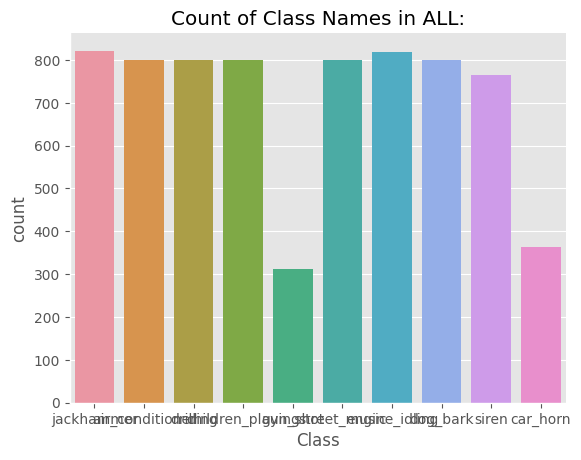

In [7]:
plt.title("Count of Class Names in ALL:")
sns.countplot(x=df["Class"])
sns.despine(top=True, right=True, left=False, bottom=False)

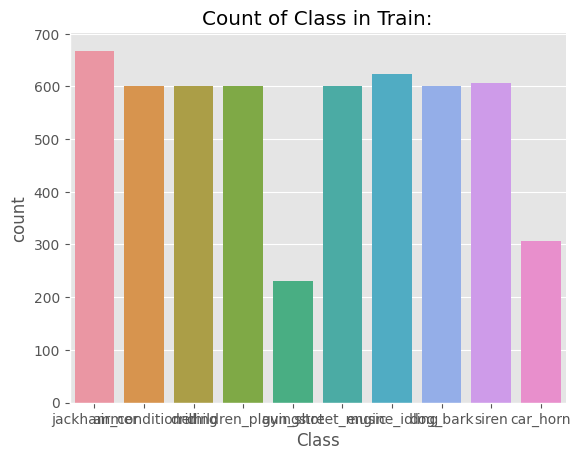

In [8]:
plt.title("Count of Class in Train:")
sns.countplot(x=train_df["Class"])
sns.despine(top=True, right=True, left=False, bottom=False)

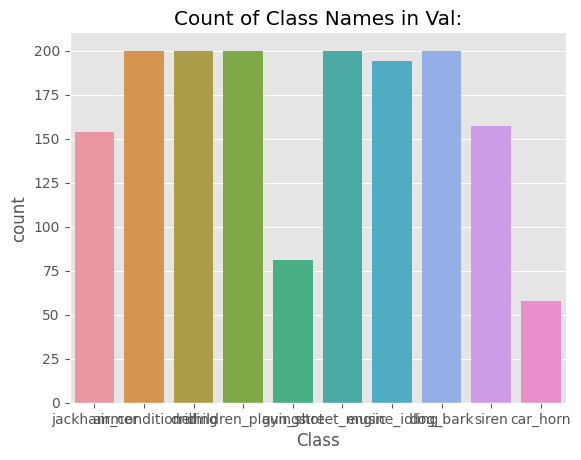

In [9]:
plt.title("Count of Class Names in Val:")
sns.countplot(x=val_df["Class"])
sns.despine(top=True, right=True, left=False, bottom=False)

## Listen to and Plot each Class

In [10]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} class name', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} class name'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

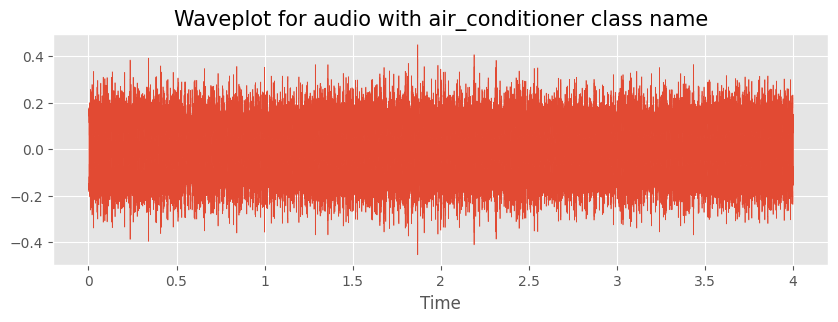

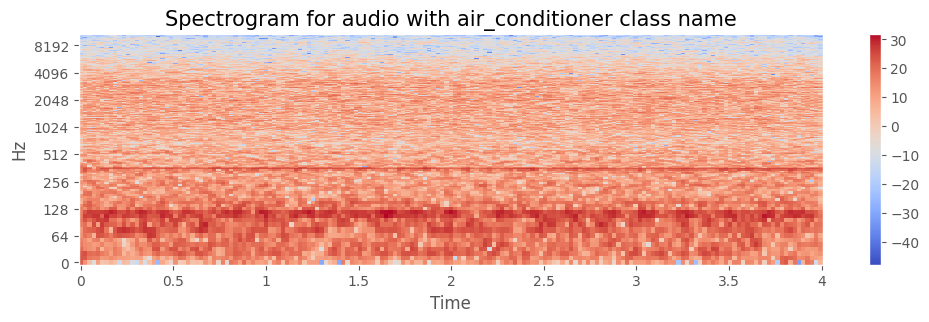

In [11]:
className='air_conditioner'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

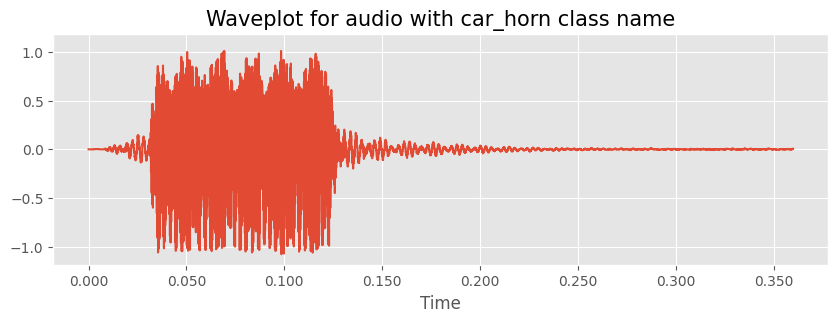

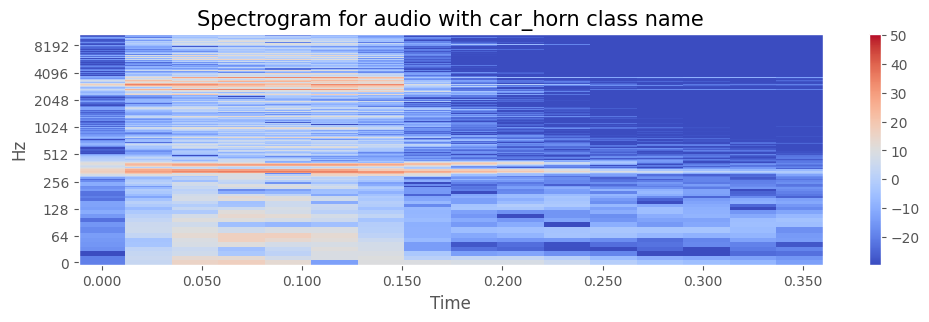

In [12]:
className='car_horn'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

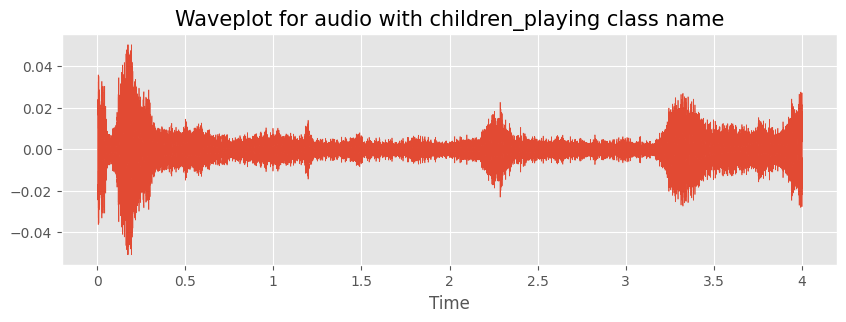

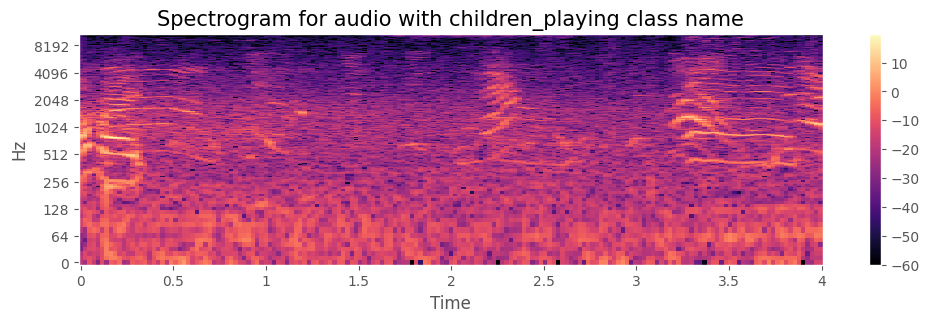

In [13]:
className='children_playing'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

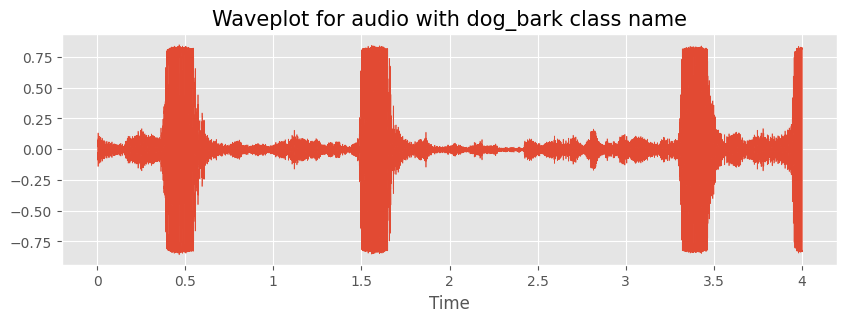

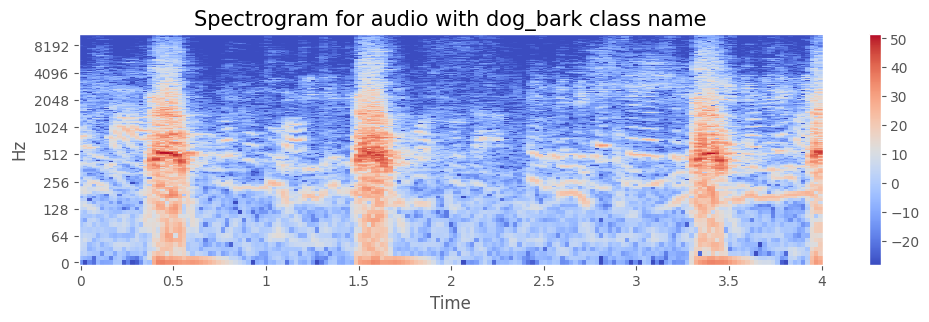

In [14]:
className='dog_bark'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

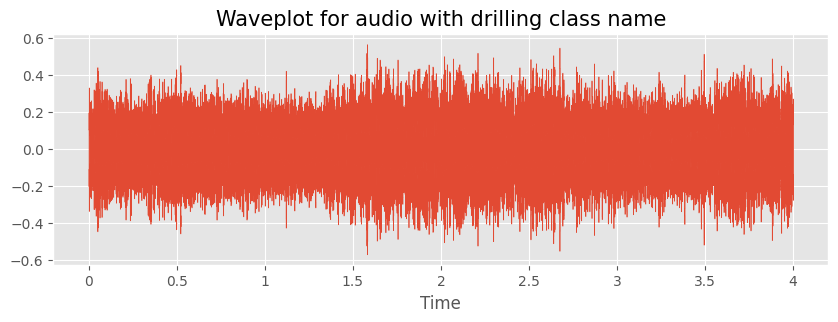

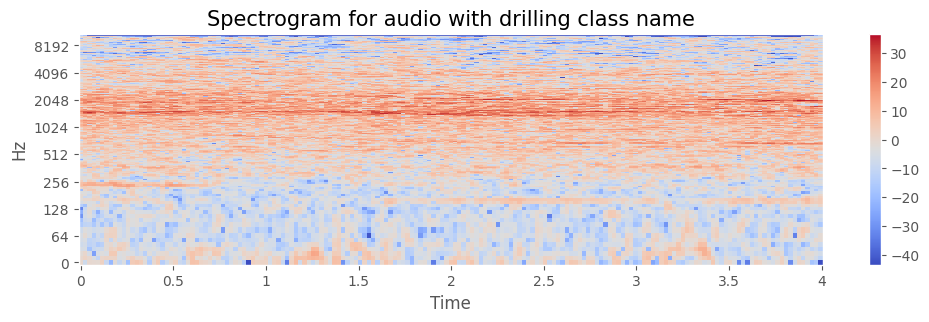

In [15]:
className='drilling'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

4.0


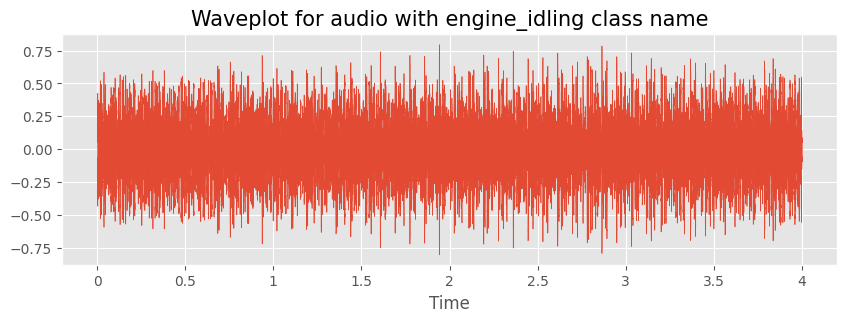

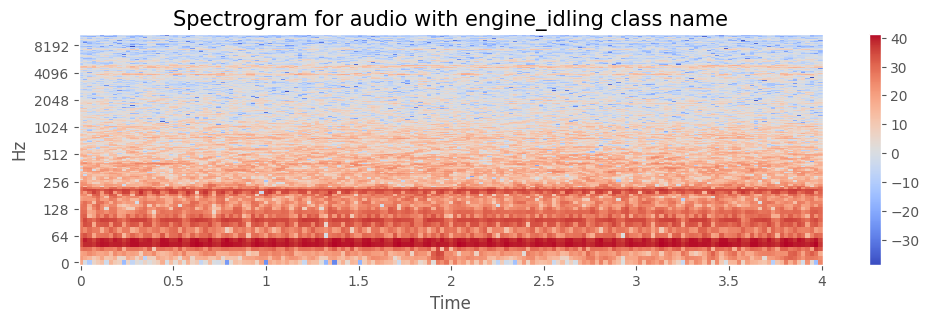

In [16]:
className='engine_idling'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
duration = librosa.get_duration(y=data, sr=sampling_rate)
print(duration)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

0.1961451247165533


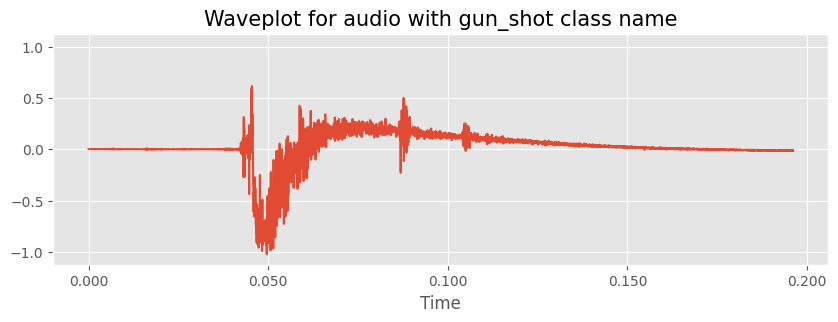

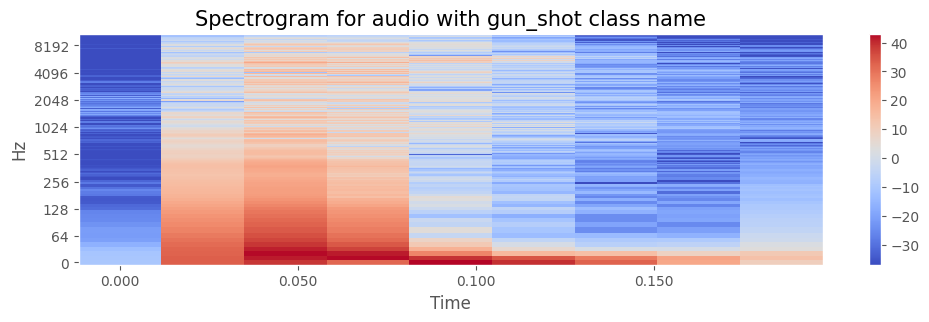

In [17]:
className='gun_shot'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
duration = librosa.get_duration(y=data, sr=sampling_rate)
print(duration)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

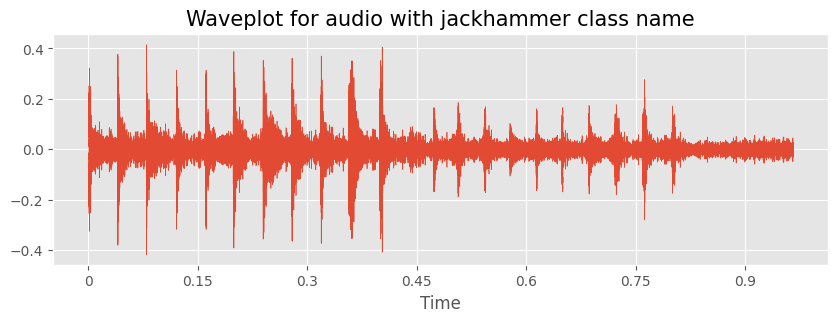

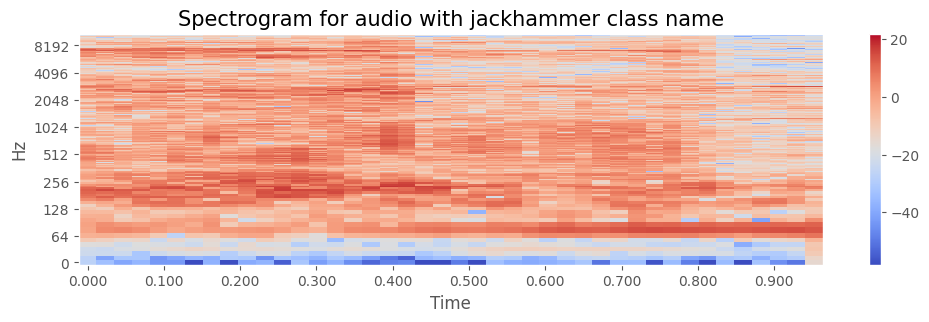

In [18]:
className='jackhammer'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

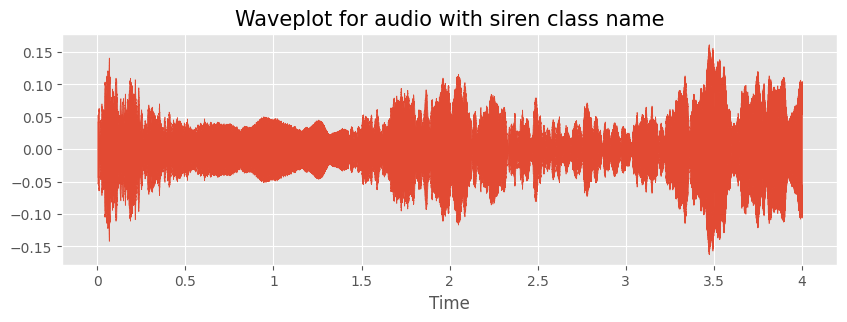

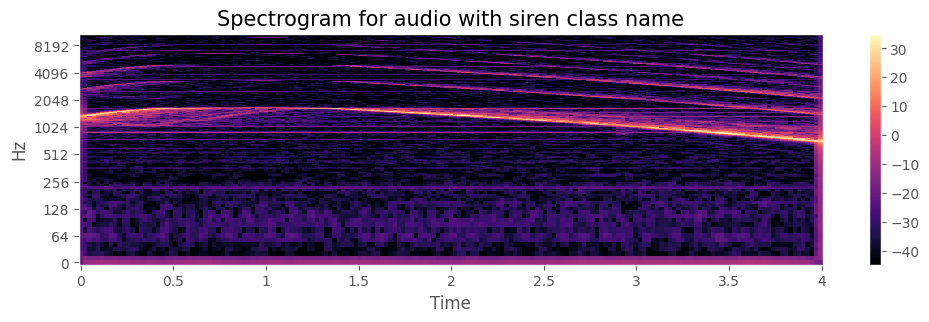

In [19]:
className='siren'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

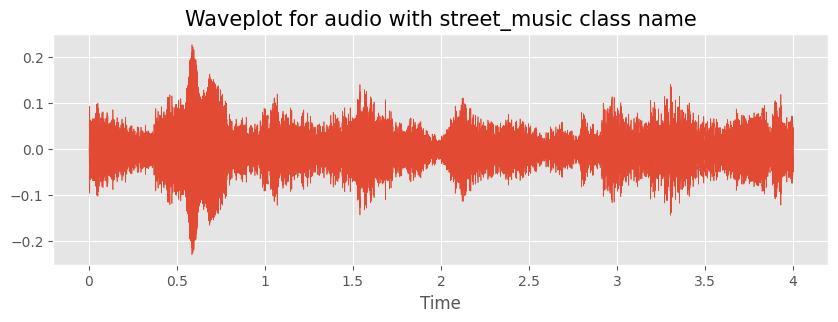

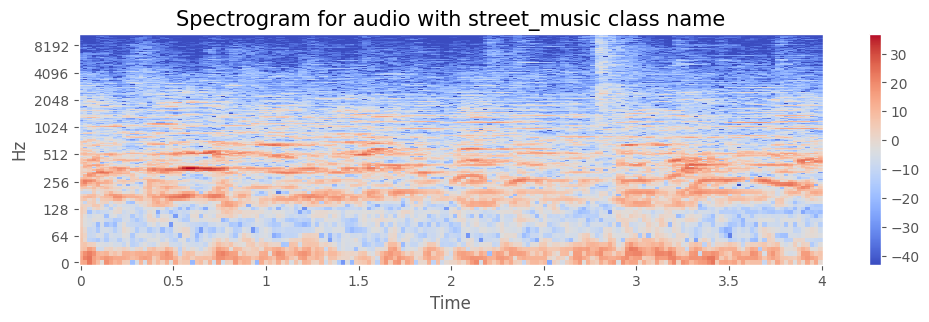

In [20]:
className='street_music'
path = np.array(df.Path[df.Class==className])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, className)
create_spectrogram(data, sampling_rate, className)
Audio(path)

### Data augmentation

We have some ways for data augmentation in sound data:

1. Noise injection
2. Stretching
3. Shifting
4. Pitching

In [21]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """Stretching data with some rate."""
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    """"Add some pitch to sound sample. Use random if you want to add random pitch with some threshold.
    Or use pitch_factor Random=False and rate for always adding fixed pitch."""
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

### Feature extraction

#### There are some features may be useful:

1. Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
2. Energy : The sum of squares of the signal values, normalized by the respective frame length.
3. Entropy of Energy :The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
3. Spectral Centroid : The center of gravity of the spectrum.
4. Spectral Spread : The second central moment of the spectrum.
5. Spectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.
6. Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
7. Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
8. MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.

In [22]:
n_fft = 2048
# n_fft = 1024
hop_length = 512
# hop_length = 256
frame_length = n_fft
n_mels = 40
n_mfcc = 13
max_len = 300 

In [23]:
def chunks(data, frame_length, hop_length):
    for i in range(0, len(data), hop_length):
        yield data[i:i+frame_length]

# Zero Crossing Rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)


def energy(data, frame_length=2048, hop_length=512):
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length


def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)


def entropy_of_energy(data, frame_length=2048, hop_length=512):
    energies = energy(data, frame_length, hop_length)
    energies /= np.sum(energies)

    entropy = 0.0
    entropy -= energies * np.log2(energies)
    return entropy


def spc(data, sr, frame_length=2048, hop_length=512):
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spectral_centroid)


# def spc_entropy(data, sr):
#     spc_en = spectral_entropy(data, sf=sr, method="fft")
#     return spc_en

def spc_flux(data):
    isSpectrum = data.ndim == 1
    if isSpectrum:
        data = np.expand_dims(data, axis=1)

    X = np.c_[data[:, 0], data]
    af_Delta_X = np.diff(X, 1, axis=1)
    vsf = np.sqrt((np.power(af_Delta_X, 2).sum(axis=0))) / X.shape[0]

    return np.squeeze(vsf) if isSpectrum else vsf


def spc_rollof(data, sr, frame_length=2048, hop_length=512):
    spcrollof = librosa.feature.spectral_rolloff(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spcrollof)


def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)


def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [24]:
def rmse_m(y):
    rmse = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mel_spc_m(y, sr):
    return librosa.feature.melspectrogram(
        y=y, sr=sr, n_fft=frame_length,
        hop_length=hop_length, n_mels=n_mels
    )
def mfcc_m(y, sr):
    mel_db = librosa.power_to_db(mel_spc_m(y, sr))
    return librosa.feature.mfcc(S=mel_db, n_mfcc=n_mfcc)

In [25]:
path = np.array(df["Path"])[658]
# path = np.array(df["Path"])[1000]
data, sampling_rate = librosa.load(path)
len(data)

47103

In [26]:
def pad_or_truncate(array, target_length):
    current_length = array.shape[0]
    if current_length < target_length:
        pad_width = target_length - current_length
        return np.pad(array, (0, pad_width), mode='constant')
    else:
        return array[:target_length]

In [27]:
def pad_or_truncate_2d(array, target_length):
    m, n = array.shape
    if n < target_length:
        pad_width = target_length - n
        # Pad along the second axis (columns)
        return np.pad(array, ((0, 0), (0, pad_width)), mode='constant')
    else:
        return array[:, :target_length]

In [28]:
print("ZCR: ", zcr(data).shape)
print("Energy: ", energy(data).shape)
print("Entropy of Energy :", entropy_of_energy(data).shape)
print("RMS :", rmse_m(data).shape)
print("Spectral Centroid :", spc(data, sampling_rate).shape)
# print("Spectral Entropy: ", spc_entropy(data, sampling_rate).shape)
print("Spectral Flux: ", spc_flux(data).shape)
print("Spectral Rollof: ", spc_rollof(data, sampling_rate).shape)
print("Chroma STFT: ", chroma_stft(data, sampling_rate).shape)
print("MelSpectrogram: ", mel_spc_m(data, sampling_rate).shape)
print("MFCC: ", mfcc_m(data, sampling_rate).shape)
print(pad_or_truncate(rmse_m(data), 180).shape)
print(pad_or_truncate_2d(mel_spc_m(data, sampling_rate), 70).shape)
print(pad_or_truncate_2d(mfcc_m(data, sampling_rate), 180).shape)
# print(mfcc_m(data, sampling_rate).s/hape)



ZCR:  (92,)
Energy:  (92,)
Entropy of Energy : (92,)
RMS : (92,)
Spectral Centroid : (92,)
Spectral Flux:  ()
Spectral Rollof:  (92,)
Chroma STFT:  (1104,)
MelSpectrogram:  (40, 92)
MFCC:  (13, 92)
(180,)
(40, 70)
(13, 180)


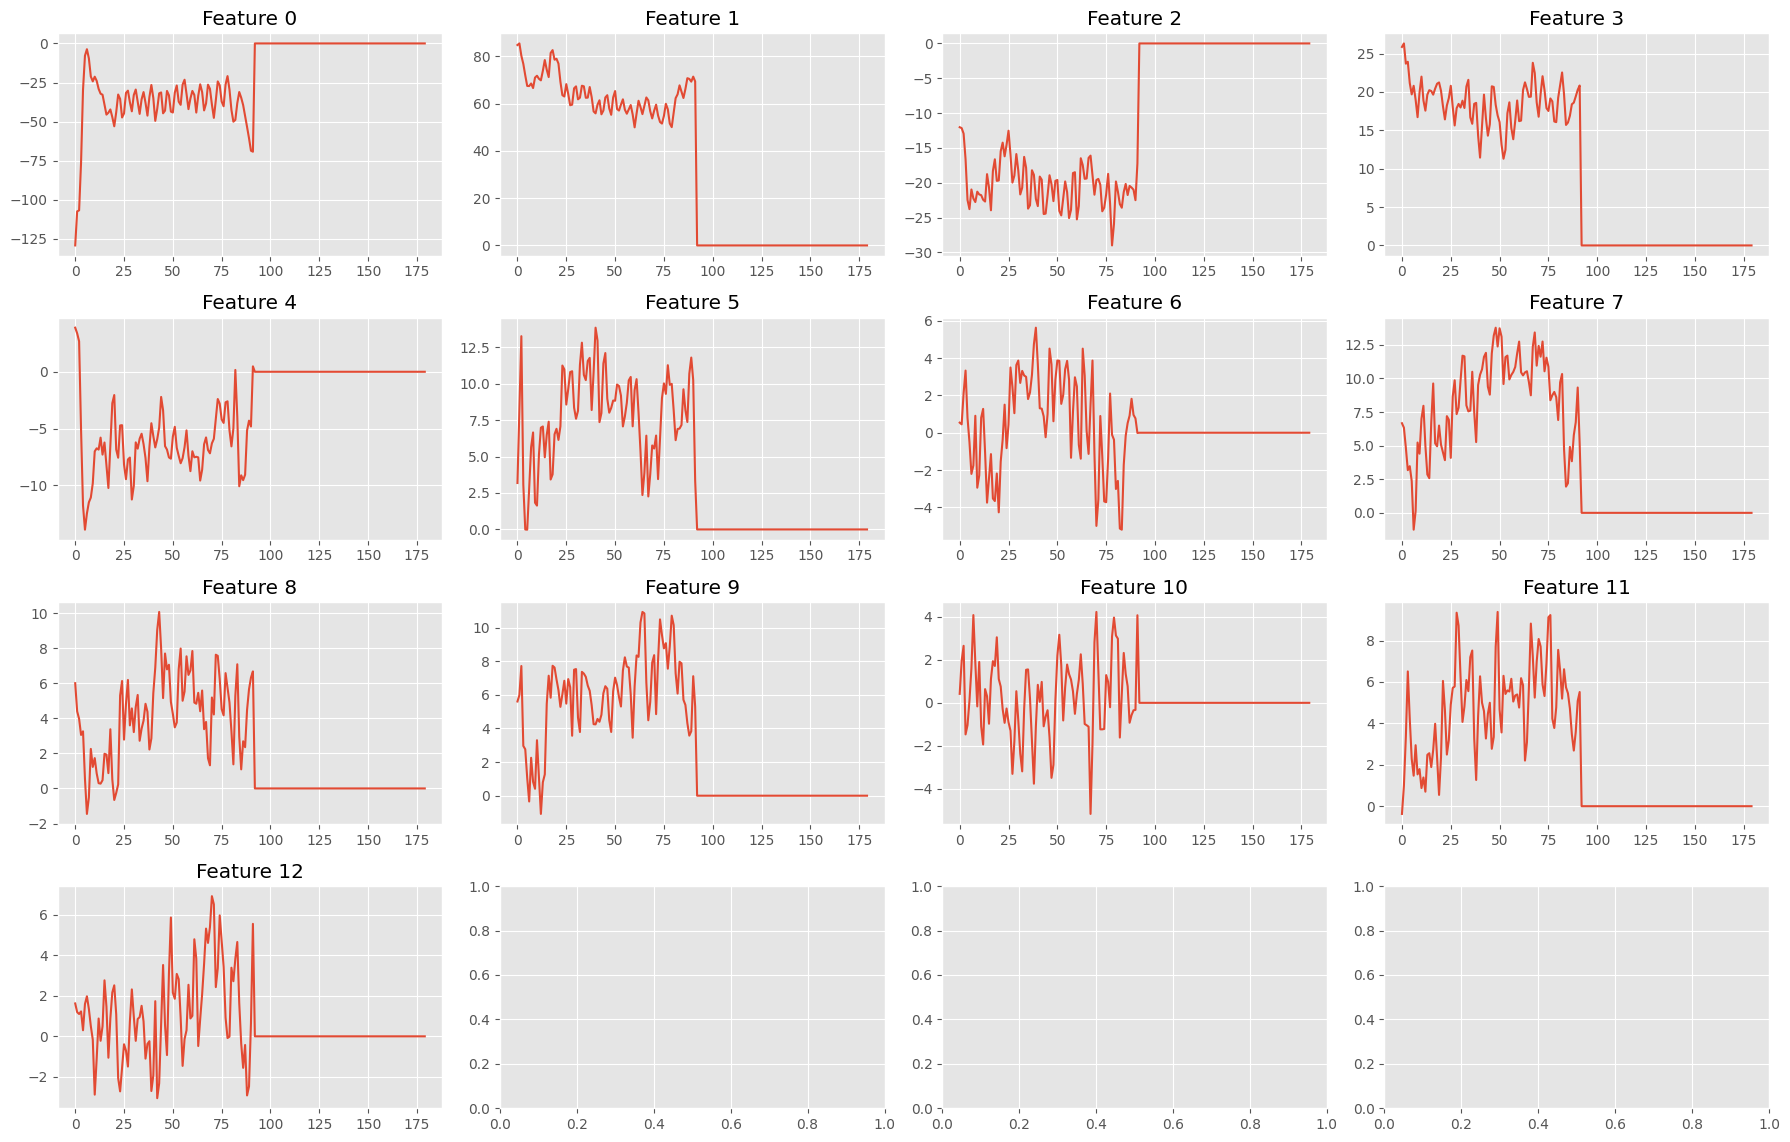

In [29]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(18, 12))  # 9 rows, 6 columns
# fig.suptitle(f"All 54 Features of Sample 0 (Label = {y})", fontsize=16)
x = pad_or_truncate_2d(mfcc_m(data, sampling_rate), 180)
for i in range(13):
    row, col = divmod(i, 4)
    axs[row, col].plot(x[i])
    axs[row, col].set_title(f"Feature {i}")
    # axs[row, col].set_xticks([])
    # axs[row, col].set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [30]:
# sizes=[]
# for x in df.Path:
#     tmp, sampling_rate = librosa.load(x)
#     sizes.append(mfcc_m(tmp, sampling_rate).shape[1])

In [31]:
# # Calculate the bin counts
# bincount_array = np.histogram(sizes, bins=np.arange(min(sizes), max(sizes)+2))[0]

# # Create a list of labels for the x-axis
# x_labels = np.arange(min(sizes), max(sizes)+1)

# # Plot the bin counts as a bar plot
# plt.bar(x_labels, bincount_array)

# # Set labels and title
# plt.xlabel('Numbers')
# plt.ylabel('Count')
# plt.show()

# print(f'min is {min(sizes)}')
# print(f'max is {max(sizes)}')

In [32]:
def extract_features(data, sr, frame_length=2048, hop_length=512, target_length=180):
    result = np.array([])

    # Each feature is extracted and padded/truncated to target_length
    # zcr_feat = pad_or_truncate(librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length).squeeze(), target_length)
    # energy_feat = pad_or_truncate(np.mean(librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length), axis=0), target_length)
    # entropy_feat = pad_or_truncate(np.mean(entropy_of_energy(data, frame_length, hop_length), axis=0), target_length)
    rmse_feat = pad_or_truncate(rmse_m(data), target_length)
    # spc_feat = pad_or_truncate(spc(data, sr, frame_length, hop_length), target_length)
    # spc_entropy_feat = pad_or_truncate(spc_entropy(data, sr), target_length)
    # spc_flux_feat = pad_or_truncate(spc_flux(data), target_length)
    # spc_rolloff_feat = pad_or_truncate(spc_rollof(data, sr, frame_length, hop_length), target_length)
    # chroma_feat = pad_or_truncate(chroma_stft(data, sr, frame_length, hop_length), target_length)
    mel_spc_feat = pad_or_truncate_2d(mel_spc_m(data, sr), target_length)
    mfcc_feat = pad_or_truncate_2d(mfcc_m(data, sr), target_length)
    # print(rmse_feat.shape, mel_spc_feat.shape, mfcc_feat.shape)
    result = np.vstack((
        # zcr_feat,
        # energy_feat,
        # entropy_feat,
        rmse_feat,
        # spc_feat,
        # spc_entropy_feat,
        # spc_flux_feat,
        # spc_rolloff_feat,
        # chroma_feat,
        mel_spc_feat,
        mfcc_feat,
    ))
    return result

In [33]:
def extract_features_with_mask(data, sr, frame_length=2048, hop_length=512, target_length=180):
    # Compute features
    mfcc = mfcc_m(data, sr)  # shape: (n_mfcc, time)

    # Store actual frame length
    actual_length = mfcc.shape[1]  # time dimension

    # Truncate/pad to target length
    mfcc_feat = pad_or_truncate_2d(mfcc, target_length)

    # Create the mask (1 = real, 0 = padded)
    mask = np.zeros(target_length, dtype=np.float32)
    mask[:min(actual_length, target_length)] = 1.0

    return mfcc_feat, mask

In [34]:
# def get_features(path, duration=2.5, offset=0.6):
def get_features(path, val=False):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    # data, sample_rate = librosa.load(path, duration=duration, offset=offset)
    data, sample_rate = librosa.load(path)

     # without augmentation
    res1 = extract_features(data, sample_rate)

    if val:
        return res1, 0, 0, 0
    result = np.array(res1)
    # data with noise
    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)

    # data with pitching
    pitched_data = pitch(data, sample_rate, random=True)
    res3 = extract_features(pitched_data, sample_rate)

    # data with pitching and white_noise
    new_data = pitch(data, sample_rate, random=True)
    data_noise_pitch = noise(new_data, random=True)
    res4 = extract_features(data_noise_pitch, sample_rate)

    return res1, res2, res3, res4
    # return res1, 0, 0, 0

In [35]:
def process_features(df, val=False):
    X, Y = [], []
    print("Feature processing...")
    for path, className, ind in zip(df.Path, df.Class, range(df.Path.shape[0])):
        r1, r2, r3, r4 = get_features(path, val)
        # print(r1.shape, r2.shape, r3.shape, r4.shape)
        # if ind == 10:
        if ind % 100 == 0:
            print(f"{ind} samples have been processed...")
            # break
        if val:    
            X.extend([r1])
            Y.extend([className])
        else:
            X.extend([r1, r2, r3, r4])
            Y.extend([className, className, className, className])
        # print(len(X[0][0]), len(X[0]), len(X), len(Y))
    print("Done.")
    return X, Y

# Process training and validation sets
# X_train, Y_train = process_features(train_df)
X_val, Y_val = process_features(val_df, val=True)


Feature processing...
0 samples have been processed...
100 samples have been processed...
200 samples have been processed...
300 samples have been processed...
400 samples have been processed...
500 samples have been processed...
600 samples have been processed...
700 samples have been processed...
800 samples have been processed...
900 samples have been processed...
1000 samples have been processed...
1100 samples have been processed...
1200 samples have been processed...
1300 samples have been processed...
1400 samples have been processed...
1500 samples have been processed...
1600 samples have been processed...
Done.


In [36]:
import pickle
import numpy as np

In [37]:


# Convert X to NumPy array for efficient storage
# X_train_np = np.array(X_train)
X_val_np = np.array(X_val)

# Save
# with open('train_data.pkl', 'wb') as f:
#     pickle.dump((X_train_np, Y_train), f)

with open('val_data.pkl', 'wb') as f:
    pickle.dump((X_val_np, Y_val), f)


In [38]:
# Load
# with open('train_data_mfcc_aug.pkl', 'rb') as f:
#     X_train_loaded, Y_train_loaded = pickle.load(f)

with open('val_data.pkl', 'rb') as f:
    X_val_loaded, Y_val_loaded = pickle.load(f)

# assert np.array_equal(X_train_loaded, X_train_np), "❌ X_train mismatch"
assert np.array_equal(X_val_loaded, X_val_np), "❌ X_val mismatch"
# assert Y_train_loaded == Y_train, "❌ Y_train mismatch"
assert Y_val_loaded == Y_val, "❌ Y_val mismatch"

In [39]:
# print(len(X_train_loaded), len(X_train_loaded[0]), len(X_train_loaded[0][0]), len(Y_train_loaded))

In [40]:
# print(X_train_loaded[0], Y_train_loaded[0])

In [41]:
print(len(X_val_loaded), len(X_val_loaded[0]))

1644 54


# Resources

1. https://urbansounddataset.weebly.com/urbansound8k.html

1


In [42]:
1

1